- Started on Oct 21
- To do the splines problem from HW2

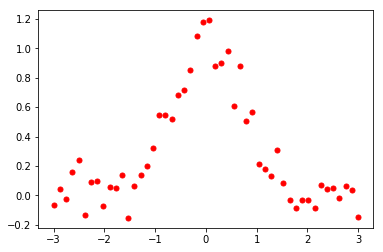

In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms=5)

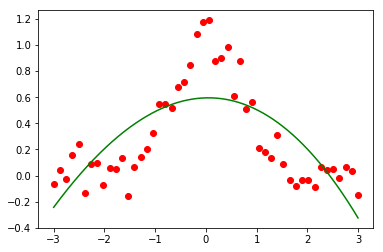

In [21]:
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(x,y,'ro', xs, spl(xs), 'g')

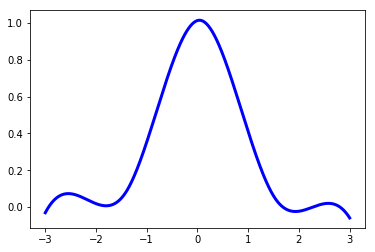

In [4]:
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

In [9]:
data = np.loadtxt('glass_cleaned.txt')

In [14]:
x_train = data[:,0]
y_train = data[:,1]

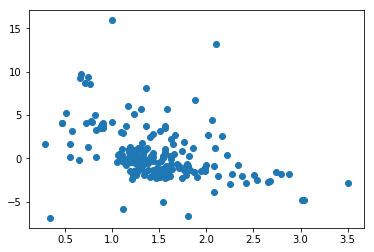

In [16]:
plt.scatter(x_train,y_train)

In [17]:
# Sort the data according to the training data column
data_sorted = data[data[:,0].argsort()]

In [18]:
data_sorted

array([[ 0.29,  1.66],
       [ 0.34, -6.85],
       [ 0.47,  4.13],
       [ 0.47,  4.13],
       [ 0.51,  5.2 ],
       [ 0.56,  1.69],
       [ 0.56,  0.18],
       [ 0.58,  3.21],
       [ 0.65, -0.21],
       [ 0.66,  9.25],
       [ 0.67,  9.77],
       [ 0.71,  8.67],
       [ 0.72,  4.1 ],
       [ 0.75,  1.34],
       [ 0.75,  9.39],
       [ 0.77,  8.64],
       [ 0.78,  4.27],
       [ 0.79,  4.23],
       [ 0.82,  5.  ],
       [ 0.83,  0.2 ],
       [ 0.83,  3.27],
       [ 0.87,  3.52],
       [ 0.87,  3.52],
       [ 0.88,  3.72],
       [ 0.89,  3.96],
       [ 0.9 ,  3.72],
       [ 0.9 ,  3.52],
       [ 0.91,  4.11],
       [ 1.  , 15.93],
       [ 1.  ,  4.22],
       [ 1.05, -0.44],
       [ 1.06,  0.41],
       [ 1.07,  0.51],
       [ 1.08,  0.06],
       [ 1.1 ,  3.01],
       [ 1.11, -0.31],
       [ 1.11,  1.05],
       [ 1.11,  0.41],
       [ 1.12, -0.07],
       [ 1.12,  2.99],
       [ 1.12, -5.85],
       [ 1.14, -0.57],
       [ 1.14, -0.53],
       [ 1.

In [24]:
# function: remove duplicate input variable entries by averaging corresponding output values
def groupby_mean(a):
    # Sort array by groupby column
    b = a[a[:,0].argsort()]

    # Get interval indices for the sorted groupby col
    idx = np.flatnonzero(np.r_[True,b[:-1,0]!=b[1:,0],True])

    # Get counts of each group and sum rows based on the groupings & hence averages
    counts = np.diff(idx)
    avg = np.add.reduceat(b[:,1:],idx[:-1],axis=0)/counts.astype(float)[:,None]

    # Finally concatenate for the output in desired format
    return np.c_[b[idx[:-1],0],avg]

In [25]:
data_sorted_dups_removed = groupby_mean(data_sorted)

In [26]:
data_sorted_dups_removed

array([[ 2.90000000e-01,  1.66000000e+00],
       [ 3.40000000e-01, -6.85000000e+00],
       [ 4.70000000e-01,  4.13000000e+00],
       [ 5.10000000e-01,  5.20000000e+00],
       [ 5.60000000e-01,  9.35000000e-01],
       [ 5.80000000e-01,  3.21000000e+00],
       [ 6.50000000e-01, -2.10000000e-01],
       [ 6.60000000e-01,  9.25000000e+00],
       [ 6.70000000e-01,  9.77000000e+00],
       [ 7.10000000e-01,  8.67000000e+00],
       [ 7.20000000e-01,  4.10000000e+00],
       [ 7.50000000e-01,  5.36500000e+00],
       [ 7.70000000e-01,  8.64000000e+00],
       [ 7.80000000e-01,  4.27000000e+00],
       [ 7.90000000e-01,  4.23000000e+00],
       [ 8.20000000e-01,  5.00000000e+00],
       [ 8.30000000e-01,  1.73500000e+00],
       [ 8.70000000e-01,  3.52000000e+00],
       [ 8.80000000e-01,  3.72000000e+00],
       [ 8.90000000e-01,  3.96000000e+00],
       [ 9.00000000e-01,  3.62000000e+00],
       [ 9.10000000e-01,  4.11000000e+00],
       [ 1.00000000e+00,  1.00750000e+01],
       [ 1.

In [27]:
glass_spline = UnivariateSpline(data_sorted_dups_removed[:,0],data_sorted_dups_removed[:,1],s=10)

In [ ]:
plt.plot()